## 데이트 준비

In [2]:
#데이터셋은 캐글의 red wine quality 데이터셋일부이다
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

wine.info()

wine.describe()

#데이터 넘파이 배열로 바꾸자 
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#늘 그랬듯이 훈련, 테스트 셋으로 바꾸자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀로 골라보자

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


## 결정트리로 풀어보자`

In [9]:
#결정트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


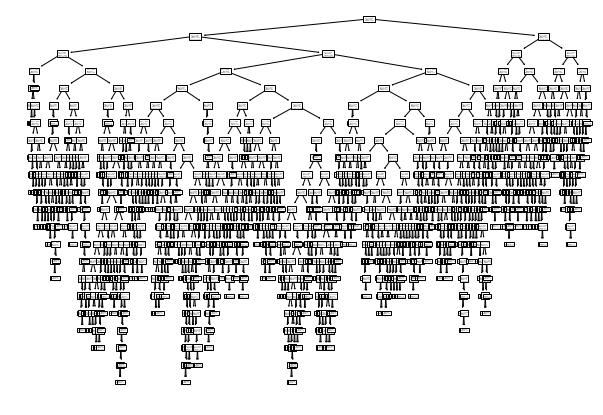

In [10]:
#사이킷 런 버전 0.21 부터 가능
#트리 그려보자
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

In [11]:
pip list

Package                            Version   
---------------------------------- ----------
absl-py                            0.11.0    
alabaster                          0.7.12    
anaconda-client                    1.7.2     
anaconda-navigator                 1.9.7     
anaconda-project                   0.8.2     
appdirs                            1.4.4     
asgiref                            3.3.1     
asn1crypto                         0.24.0    
astor                              0.8.1     
astroid                            2.2.5     
astropy                            3.1.2     
atomicwrites                       1.3.0     
attrs                              19.1.0    
Automat                            20.2.0    
Babel                              2.6.0     
backcall                           0.1.0     
backports.os                       0.1.1     
backports.shutil-get-terminal-size 1.0.0     
backtrader                         1.9.76.123
bcrypt                            

In [21]:
#pip install --upgrade scikit-learn

  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\82102\\anaconda3\\lib\\site-packages\\~klearn\\linear_model\\cd_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



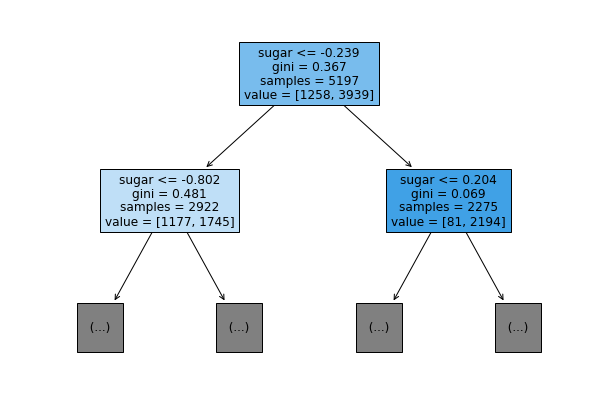

In [16]:
#노드 확인
#max_depth 매개변수로 원하는 갯수 만큼 트리를 볼 수 있다 (노드 제외)
#feaure_names 로 특성의 이름을 전달
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol',
                                                            'sugar','pH'])
plt.show()


# 교차검증

## 데이터 준비

In [13]:
import pandas as pd
import numpy as np
wine = pd.read_csv('https://bit.ly/wine-date')

#class 열을 타깃, 나머지는 특성 배열에 저장 굿
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#훈련셋 테스트 셋 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state =42)

#그다음 훈련셋을 한번 더 나눈다 (검증 셋을 만들자)
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state =42)

## 훈련데이터, 검증데이터 모델 평가

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

#좀 과적합 됐다

0.9971133028626413
0.864423076923077


In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0099709 , 0.00698018, 0.00798392, 0.00797653, 0.00698733]), 'score_time': array([0.        , 0.00099778, 0.00199151, 0.0009973 , 0.00099111]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [17]:
import numpy as np 
print(np.mean(scores['test_score']))

0.855300214703487


In [20]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


### 그리드 서치`

In [29]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}
#0.0001~0.0005까지 0.0001씩 증가하는 5개 값 시도
#파라미터를 params 변수로 만들어 클래스의 전달
gs = GridSearchCV(DecisionTreeClassifier(random_state =42), params,n_jobs =-1)
#그다음 일반 모델 훈련하는 것 처럼 해주면 된다
#그리드 서치는 파라미터를 다섯개 정했기 때문에 내부에서 5번 실행
#cv 매개변수 기본값은 5이다 즉 파라미터 5개이기 때문에 5*5 = 25번 실행


In [30]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [31]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117
